<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Acquire-Data" data-toc-modified-id="Acquire-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Acquire Data</a></span></li><li><span><a href="#Prepare" data-toc-modified-id="Prepare-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Final-Prep" data-toc-modified-id="Final-Prep-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Prep</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluate</a></span></li><li><span><a href="#Test-df-Evaluation" data-toc-modified-id="Test-df-Evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Test df Evaluation</a></span></li><li><span><a href="#Visualize-Model" data-toc-modified-id="Visualize-Model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualize Model</a></span></li><li><span><a href="#Logistic-Regression-Conclusions" data-toc-modified-id="Logistic-Regression-Conclusions-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Logistic Regression Conclusions</a></span></li><li><span><a href="#What-if-I-Only-Use-time_on_site-to-predict-ad_click?" data-toc-modified-id="What-if-I-Only-Use-time_on_site-to-predict-ad_click?-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>What if I Only Use time_on_site to predict ad_click?</a></span><ul class="toc-item"><li><span><a href="#So,-using-ONLY-time_on_site-does-not-predict-as-well.-I-don't-see-any-reason-to-continue-with-just-that-feature." data-toc-modified-id="So,-using-ONLY-time_on_site-does-not-predict-as-well.-I-don't-see-any-reason-to-continue-with-just-that-feature.-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>So, using ONLY time_on_site does not predict as well. I don't see any reason to continue with just that feature.</a></span></li></ul></li><li><span><a href="#Validate-Split-Practice" data-toc-modified-id="Validate-Split-Practice-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Validate Split Practice</a></span></li></ul></div>

## Problem Statement

You have been hired as a consultant to a start-up that is running targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Data Dictionary: 

RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):

|  index  |Column  |      Non-Null Count | Dtype | 
|:-------|:--------------------|:-----|:------|
| 0 |  names      |   499 non-null  |  object |
| 1  | emails      |  499 non-null   | object 
| 2  | country      | 499 non-null   | object |
| 3  | time_on_site | 499 non-null   | float64|
| 4  | income       | 499 non-null  |  float64|
|5  | ad_click     | 499 non-null   | int64  |
 

## Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=16)

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

## Acquire Data

In [2]:
df = pd.read_csv('Facebook_Ads_2.csv', encoding='latin1')
df.columns = ['names', 'emails', 'country', 'time_on_site', 'income', 'ad_click']
df.head()

,names,emails,country,time_on_site,income,ad_click
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         499 non-null    object 
 1   emails        499 non-null    object 
 2   country       499 non-null    object 
 3   time_on_site  499 non-null    float64
 4   income        499 non-null    float64
 5   ad_click      499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [4]:
# I will make an assumption using Domain Knowledge here that this is measured in minutes bc that info is not provided

df.time_on_site.mean()

32.92017833020841

In [5]:
df.describe()

,time_on_site,income,ad_click
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [6]:
# Look at breakdown of ad_clicks, or target. Very balanced dataset.

click_look = (
pd.DataFrame(
    {'count': df.ad_click.value_counts(dropna=False), 
    'percent': (df.ad_click.value_counts(normalize=True, dropna=False) * 100)})
)

click_look

,count,percent
1,250,50.1002
0,249,49.8998


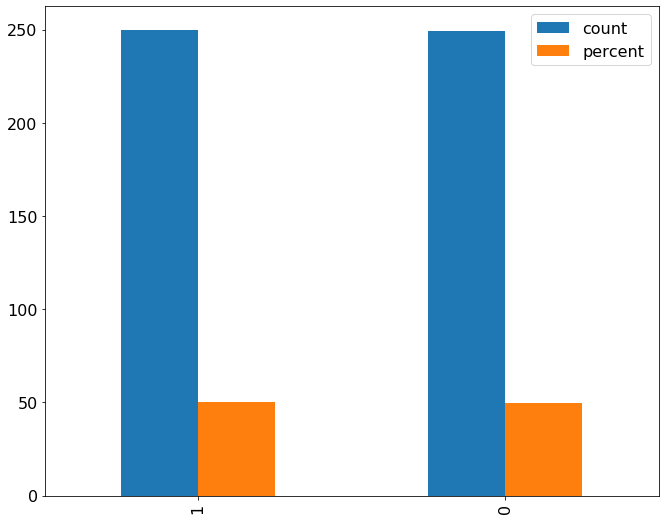

In [7]:
click_look.plot(kind='bar')

plt.show()

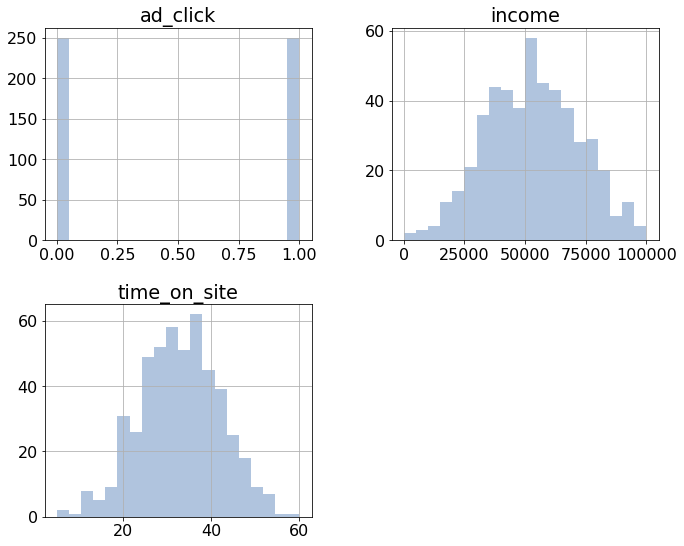

In [8]:
# This is some pretty perfect data...

df.hist(color='lightsteelblue', bins=20)
plt.show()

In [9]:
df.country.value_counts(dropna=False).sum()

499

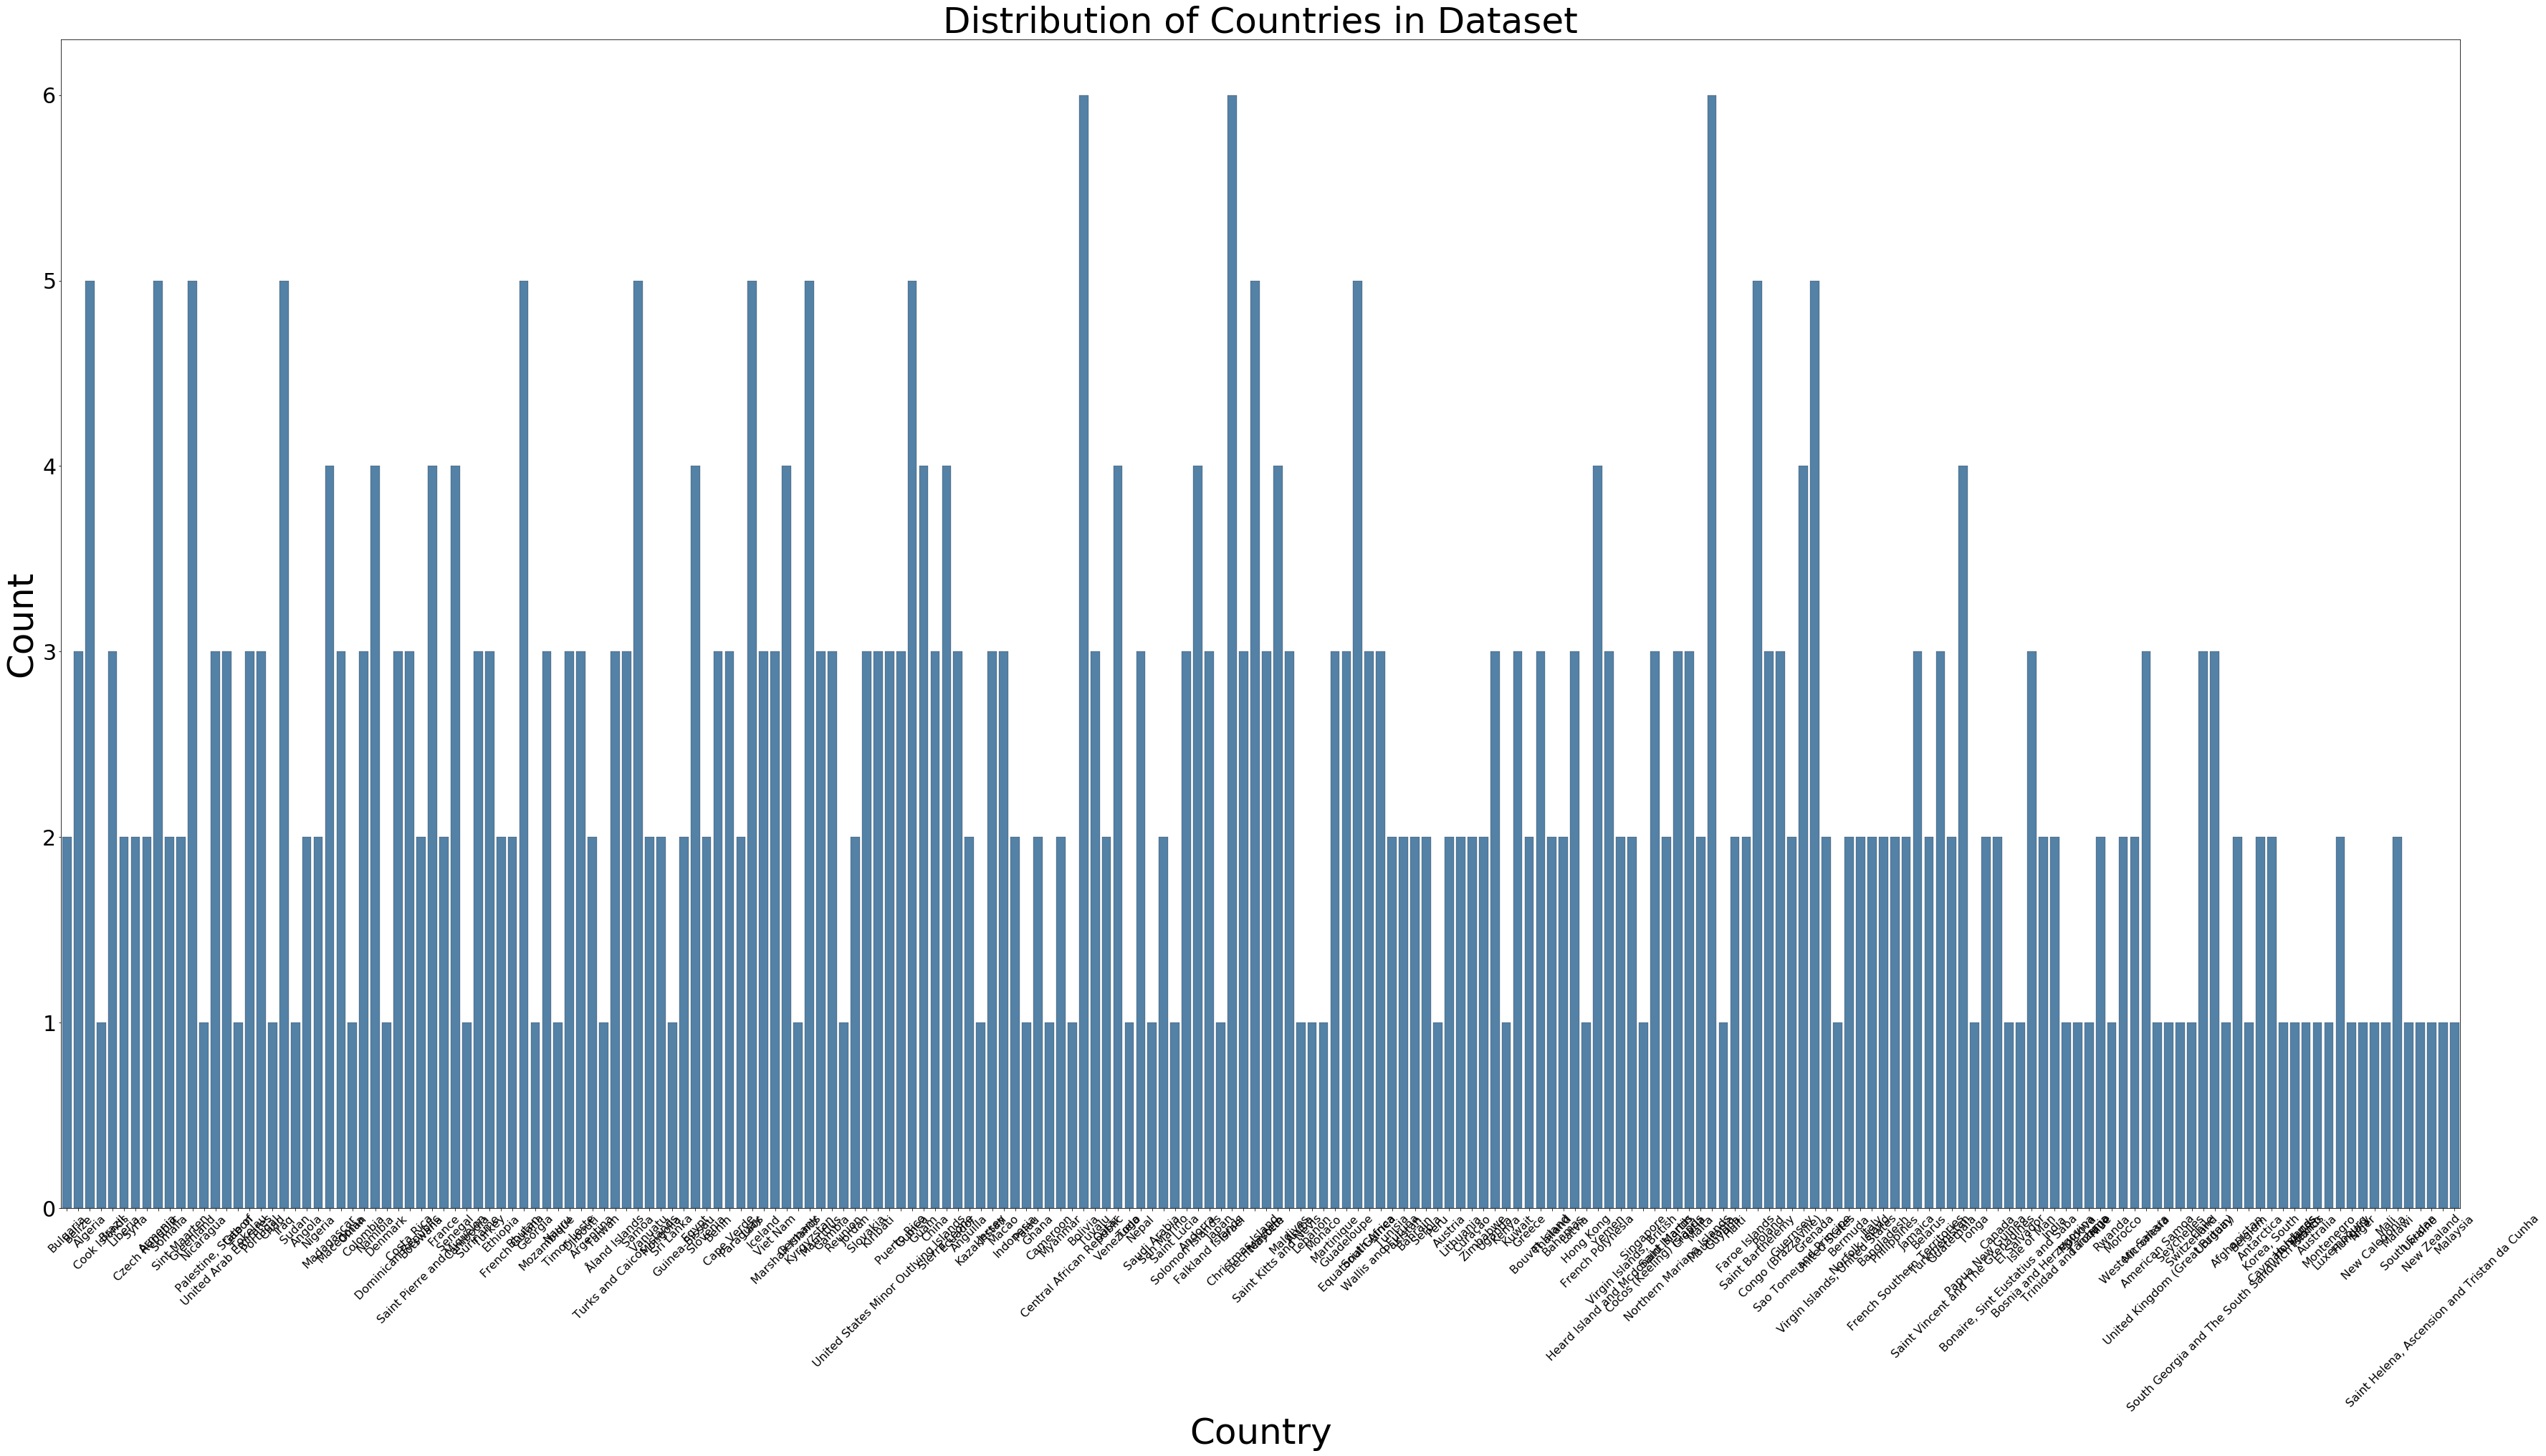

In [10]:
# I can see that most countries have only 1 observation in train and at most 6

plt.figure(figsize=(60,30))

sns.countplot(x='country', data=df, color='steelblue', ec='black', linewidth=.2)

plt.xticks(rotation=45)
plt.yticks(size=30)
plt.title('Distribution of Countries in Dataset', size=50)

plt.xlabel('Country', size=50)
plt.ylabel('Count', size=50)
plt.show()

## Prepare

- What features will we use to predict?


>The dataset has the numeric values of `income` and `time_on_site`. I might want to encode `country`, so that I can use it as a predictor in my classification model. I will explore the relationships in the dataset to decide about country.

>After light exploration I found that my df has 499 different countries, some with only one observation, so for my first logistic regression model, I'm going to drop country. I can try to encode and use it later to see if it adds value.


- I will create a baseline to beat.


- I will start with a logistic regression model to try to beat my baseline.

In [11]:
# I will drop the emails and names columns, and I will do a train test split before exploring more

df = pd.read_csv('Facebook_Ads_2.csv', encoding='latin1')
df.columns = ['names', 'emails', 'country', 'time_on_site', 'income', 'ad_click']
df = df.drop(columns=['emails', 'names', 'country'])
train, test = train_test_split(df, train_size=.75, random_state=123)

train.head()

,time_on_site,income,ad_click
181,46.525525,86554.95970,1
204,34.945644,39815.21162,0
410,38.618719,58365.20993,1
404,23.973013,25710.85639,0
343,45.663502,77879.46698,1


In [12]:
train.shape

(374, 3)

In [13]:
test.shape

(125, 3)

## Explore 

- Once I have split my data, I will explore before doing more preparation of my data like scaling and encoding. 


- This section will help me decide about final preparation before creating a baseline and modeling to beat my baseline.

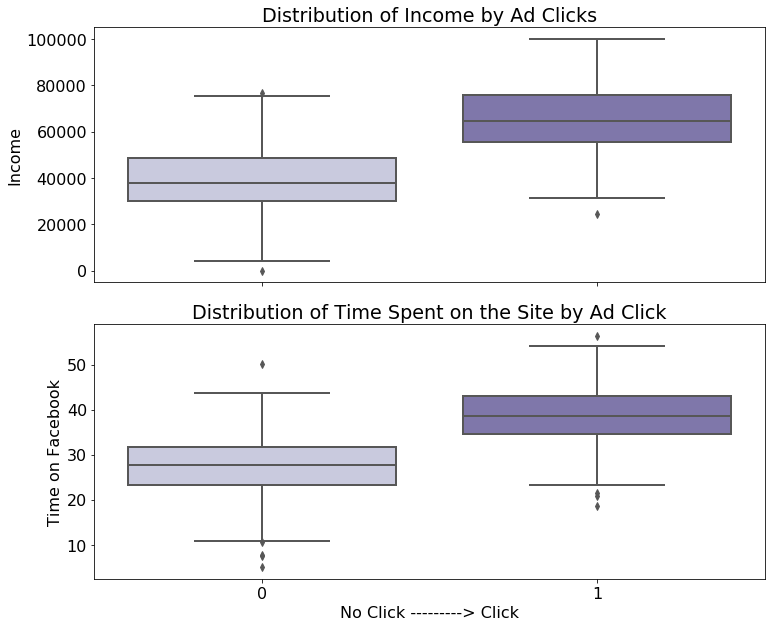

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.boxplot(x='ad_click', y='income', data=train, palette='Purples', linewidth=2, ax=ax1)
ax1.set(title='Distribution of Income by Ad Clicks', xlabel='', ylabel='Income')

sns.boxplot(x='ad_click', y='time_on_site', data=train, palette='Purples', linewidth=2, ax=ax2)
ax2.set(title='Distribution of Time Spent on the Site by Ad Click', xlabel='No Click ---------> Click', ylabel='Time on Facebook')

plt.tight_layout()
plt.show()

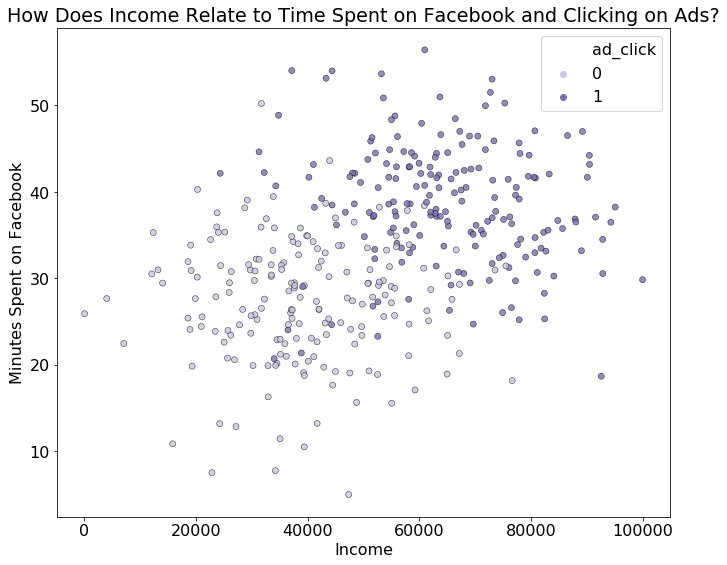

In [15]:
sns.scatterplot(x='income', y='time_on_site', data=train, hue='ad_click', palette='Purples', ec='black', linewidth=.5, alpha=.8)

plt.title('How Does Income Relate to Time Spent on Facebook and Clicking on Ads?')
plt.xlabel('Income')
plt.ylabel('Minutes Spent on Facebook')
plt.legend()
plt.show()

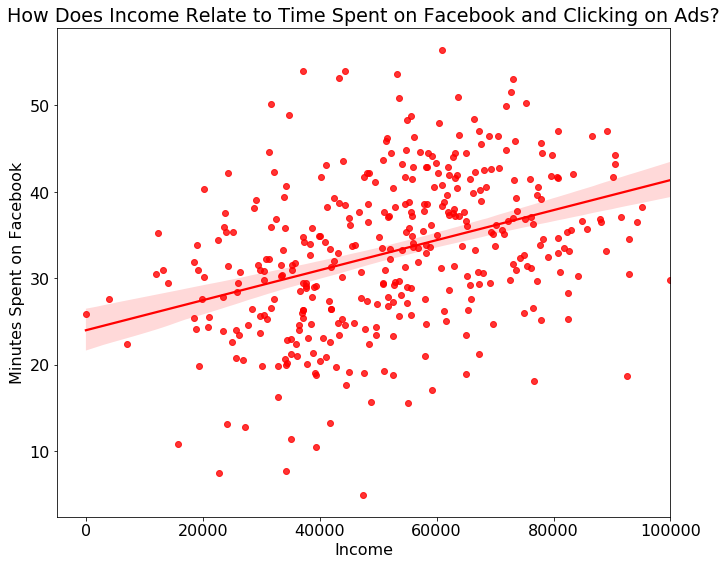

In [16]:
sns.regplot(x='income', y='time_on_site', data=train, color='r')

plt.title('How Does Income Relate to Time Spent on Facebook and Clicking on Ads?')
plt.xlabel('Income')
plt.ylabel('Minutes Spent on Facebook')

plt.show()

In [17]:
# This is not a really strong correlation, so these variables should both be able to serve as features in my model

from scipy import stats

r, p = stats.pearsonr(train['income'], train['time_on_site'])

print(f'income and time_on_site have a pearson r score of {r:.2%} and a p-value of {p:.3}.')

income and time_on_site have a pearson r score of 37.32% and a p-value of 8.33e-14.


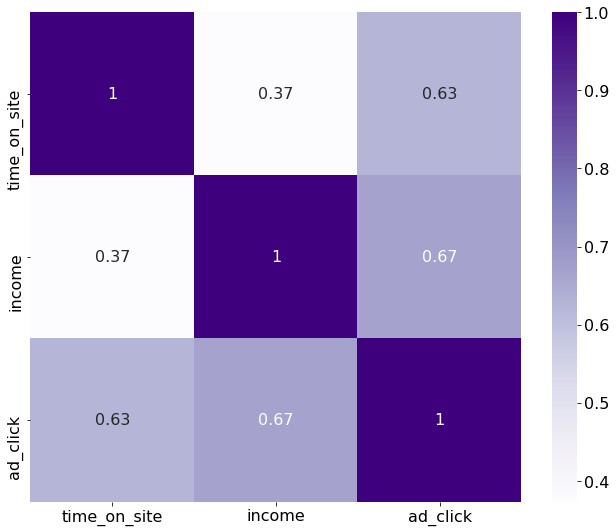

In [18]:
sns.heatmap(train.corr(), annot=True, cmap='Purples')
plt.show()

## Final Prep

In [19]:
# Feature Scaling

scaler = MinMaxScaler()
train[['income', 'time_on_site']] = scaler.fit_transform(train[['income', 'time_on_site']])
test[['income', 'time_on_site']] = scaler.transform(test[['income', 'time_on_site']])
train.head()

,time_on_site,income,ad_click
181,0.807345,0.865523,1
204,0.582207,0.398032,0
410,0.653620,0.583569,1
404,0.368876,0.256960,0
343,0.790585,0.778750,1


In [20]:
test.head(1)

,time_on_site,income,ad_click
85,0.49725,0.65736,1


In [21]:
X_train = train.drop(columns=['ad_click'])
X_test = test.drop(columns=['ad_click'])
y_train = train[['ad_click']]
y_test = test[['ad_click']]

In [22]:
X_train.shape

(374, 2)

In [23]:
y_train.shape

(374, 1)

## Model

In [24]:
# Create a basline - If I predict an ad click every time, I will be right 51% of the time.
# My model needs to predict ad clicks correctly more than 51% of the time.

train.ad_click.value_counts(normalize=True)

1    0.510695
0    0.489305
Name: ad_click, dtype: float64

In [25]:
# Create, fit, and use my logistic regressor

logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

eval_df = train[['ad_click']].rename(columns={'ad_click': 'actual'})
eval_df['yhat'] = logit.predict(X_train)
eval_df.head()

,actual,yhat
181,1,1
204,0,0
410,1,1
404,0,0
343,1,1


In [26]:
# Create a labeled DataFrame for probability

labels = logit.classes_
yhat_probability = logit.predict_proba(X_train)
probability_df = pd.DataFrame(yhat_probability, columns=labels)
probability_df.head()

,0,1
0,0.035198,0.964802
1,0.616686,0.383314
2,0.282169,0.717831
3,0.914985,0.085015
4,0.060733,0.939267


## Evaluate

In [27]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.91


In [28]:
pd.crosstab(eval_df.yhat, eval_df.actual, 
            rownames=['Predicted'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,0,1
Predicted,,
0,163,15
1,20,176


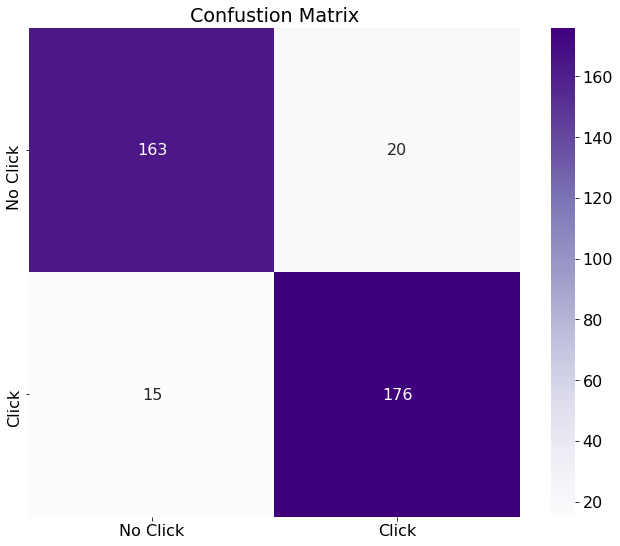

In [29]:
cm = confusion_matrix(eval_df.actual, eval_df.yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples', xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])

plt.title('Confustion Matrix')
plt.show()

In [30]:
print(classification_report(eval_df.actual, eval_df.yhat))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       183
           1       0.90      0.92      0.91       191

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374



## Test df Evaluation

In [31]:
test_eval_df = test[['ad_click']].rename(columns={'ad_click': 'actual'})
test_eval_df['yhat'] = logit.predict(X_test)
test_eval_df.head()

,actual,yhat
85,1,1
309,1,1
59,1,1
221,0,0
131,1,1


In [32]:
pd.crosstab(test_eval_df.yhat, test_eval_df.actual, 
            rownames=['Predicted'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,0,1
Predicted,,
0,61,5
1,5,54


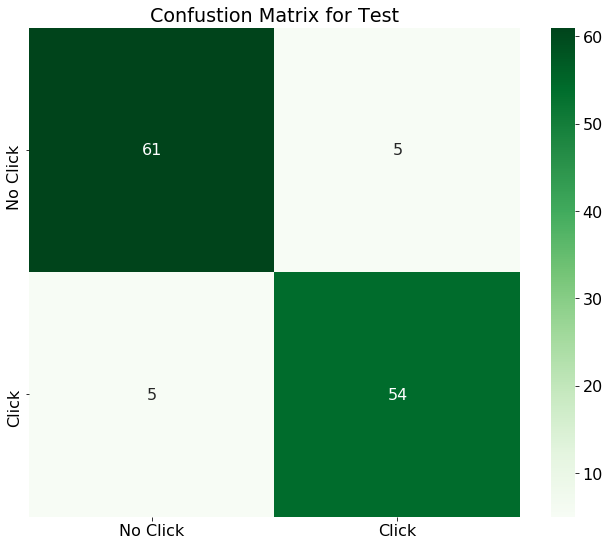

In [33]:
cm = confusion_matrix(test_eval_df.actual, test_eval_df.yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])

plt.title('Confustion Matrix for Test')
plt.show()

In [34]:
print(classification_report(test_eval_df.actual, test_eval_df.yhat))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.92      0.92      0.92        59

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



In [35]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.92


## Visualize Model

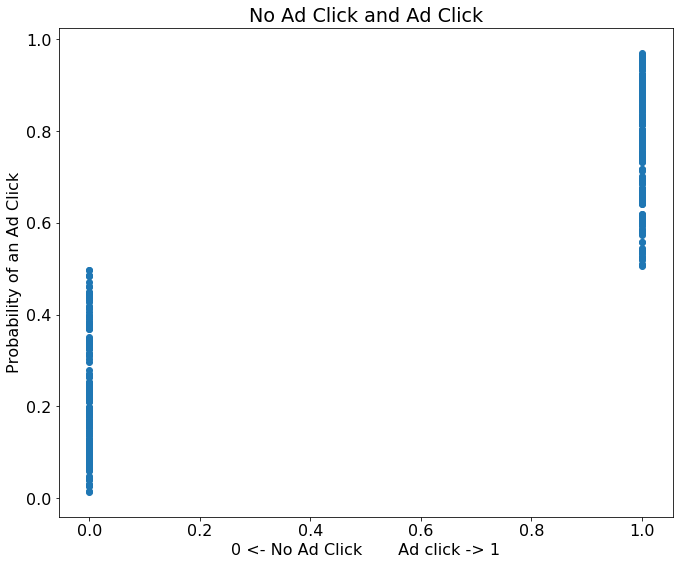

In [36]:
# Estimate Probability, an array of tuples with probability of (no click, click)

yhat_probability = logit.predict_proba(X_train)

# Verify

yhat_probability = [i[1] for i in yhat_probability]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(eval_df.yhat, yhat_probability)


plt.ylabel('Probability of an Ad Click')
plt.xlabel('0 <- No Ad Click       Ad click -> 1')
plt.title('No Ad Click and Ad Click')
plt.show()

In [37]:
eval_df['yhat_proba_positive'] = yhat_probability
eval_df.head()

,actual,yhat,yhat_proba_positive
181,1,1,0.964802
204,0,0,0.383314
410,1,1,0.717831
404,0,0,0.085015
343,1,1,0.939267


## Logistic Regression Conclusions

- My model is predicting Test at 92% with a very balanced accuracy rate of 92%. 

- The features of income and time_on_site are doing a MUCH better job than my baseline prediction accuracy of 51%.

- This model has value.

## What if I Only Use time_on_site to predict ad_click?

In [38]:
X_train = train[['time_on_site']]
X_test = test[['time_on_site']]

In [39]:
# Create, fit, and use my logistic regressor using only time_on_site

logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

eval_df = train[['ad_click']].rename(columns={'ad_click': 'actual'})
eval_df['yhat'] = logit.predict(X_train)
eval_df.head()

,actual,yhat
181,1,1
204,0,1
410,1,1
404,0,0
343,1,1


In [40]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


### So, using ONLY time_on_site does not predict as well. I don't see any reason to continue with just that feature.

## Validate Split Practice

In [41]:
train, test = train_test_split(df, random_state=123, train_size=.75)
train, validate = train_test_split(train, random_state=123, train_size=.75)

In [42]:
test.shape

(125, 3)

In [43]:
train.shape

(280, 3)

In [44]:
validate.shape

(94, 3)

In [45]:
model = smf.logit('ad_click ~ income + time_on_site', train).fit()

Optimization terminated successfully.
         Current function value: 0.280306
         Iterations 8


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ad_click   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.5955
Time:                        21:00:11   Log-Likelihood:                -78.486
converged:                       True   LL-Null:                       -194.02
Covariance Type:            nonrobust   LLR p-value:                 6.690e-51
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.7731      1.523     -8.385      0.000     -15.759      -9.787
income           0.0001   1.56e-05      7.247      0.000    8.27e-05       0.000
time_on_site     0.2067      0.033      6.201      0.000       0.141       0.272
================================================================================
"""

In [47]:
probs = model.predict(train)
yhat = (probs > .49).astype(int)
actual = train.ad_click

accuracy_score(actual, yhat)

0.8928571428571429

In [48]:
probs.head()

295    0.888004
262    0.998455
167    0.877148
234    0.998672
252    0.007577
dtype: float64

In [49]:
actual.head()

295    0
262    1
167    0
234    1
252    0
Name: ad_click, dtype: int64

In [50]:
probs = model.predict(validate)
yhat = (probs > .49).astype(int)
actual = validate.ad_click

accuracy_score(actual, yhat)

0.9468085106382979

In [51]:
probs = model.predict(test)
yhat = (probs > .49).astype(int)
actual = test.ad_click

accuracy_score(actual, yhat)

0.92

In [52]:
# Based on our summary coefficients, let's try the model without income...

model = smf.logit('ad_click ~ time_on_site', train).fit()

Optimization terminated successfully.
         Current function value: 0.457213
         Iterations 7


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ad_click   No. Observations:                  280
Model:                          Logit   Df Residuals:                      278
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.3402
Time:                        21:00:11   Log-Likelihood:                -128.02
converged:                       True   LL-Null:                       -194.02
Covariance Type:            nonrobust   LLR p-value:                 1.500e-30
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.4591      0.903     -8.263      0.000      -9.228      -5.690
time_on_site     0.2239      0.027      8.342      0.000       0.171       0.276
================================================================================
"""

In [54]:
probs = model.predict(train)
yhat = (probs > .49).astype(int)
actual = train.ad_click

accuracy_score(actual, yhat)

0.7892857142857143

In [55]:
probs = model.predict(validate)
yhat = (probs > .49).astype(int)
actual = validate.ad_click

accuracy_score(actual, yhat)

0.8191489361702128

In [56]:
probs = model.predict(test)
yhat = (probs > .49).astype(int)
actual = test.ad_click

accuracy_score(actual, yhat)

0.848